# **K-Means Clustering**

## **What is Clustering?**

Clustering is an **unsupervised machine learning technique** that groups similar data points together without using labeled output.

Example:
Grouping customers by buying behavior, grouping images by similarity, etc.

---

# **What is K-Means?**

K-Means is a popular clustering algorithm that:

1. Selects *K* cluster centers (centroids).
2. Assigns every data point to the nearest centroid.
3. Recalculates centroids.
4. Repeats until results stabilize.

---

## **Key Terms**

| Term               | Meaning                           |
| ------------------ | --------------------------------- |
| Centroid           | Center of a cluster               |
| Cluster            | Group of similar data points      |
| Euclidean Distance | Measures closeness between points |
| K                  | Number of clusters you want       |

---

# **Dataset Used**

We will use the **Iris dataset** from Seaborn.

Although Iris has labels (`species`), we ignore them while training since clustering is unsupervised.
We later compare results with true labels to see how well K-Means worked.

---

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
df=pd.read_csv("mall_customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [93]:
df.duplicated().sum()

np.int64(0)

In [94]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [95]:
x=df.drop('CustomerID',axis=1)

In [96]:
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
x_scaled=Scaler.fit_transform(x)
print(x_scaled[:10])

[[-1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [-1.12815215 -1.28103541 -1.73899919  1.19570407]
 [ 0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [ 0.88640526 -1.13750203 -1.70082976  1.04041783]
 [ 0.88640526 -0.56336851 -1.66266033 -0.39597992]
 [ 0.88640526 -1.20926872 -1.66266033  1.00159627]
 [ 0.88640526 -0.27630176 -1.62449091 -1.71591298]
 [ 0.88640526 -1.13750203 -1.62449091  1.70038436]
 [-1.12815215  1.80493225 -1.58632148 -1.83237767]
 [ 0.88640526 -0.6351352  -1.58632148  0.84631002]]


# **Train K-Means Model**

In [97]:
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=6,random_state=42)
Kmeans.fit(x_scaled)

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [98]:
clusters=Kmeans.labels_
df['clusters']=clusters
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,0,19,15,39,2
1,2,0,21,15,81,2
2,3,1,20,16,6,4
3,4,1,23,16,77,4
4,5,1,31,17,40,4


In [99]:
# checking centeroids 
print(Kmeans.cluster_centers_)

[[-1.12815215  1.31794399 -0.52575662 -0.44589335]
 [-0.93628954  0.010765    1.06009228 -1.38870269]
 [-1.12815215 -0.74922584 -0.08890541  0.79653879]
 [ 0.74747027 -0.40498685  1.16319361  0.85166472]
 [ 0.88640526 -0.93017604 -0.73599142  0.30065142]
 [ 0.88640526  0.79409079 -0.24064607 -0.5306164 ]]


Text(0.5, 1.0, 'KMeans Clustering of Mall customers')

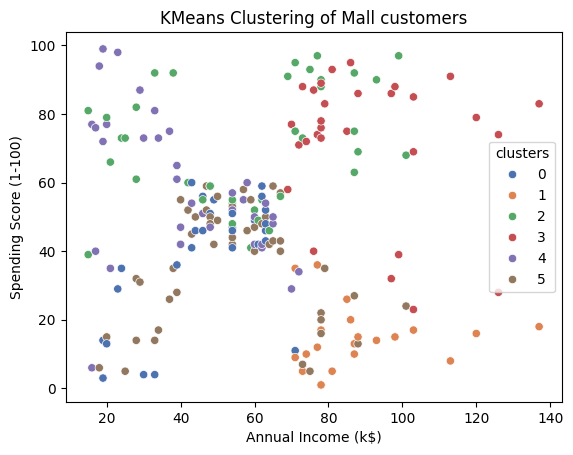

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(data=df,
                x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='clusters'
                ,palette='deep') 
plt.title('KMeans Clustering of Mall customers')

## **Measuring the Performance of K-Means Clustering**
**1.Inertia**

* Measures how close the points in a cluster are to their centroid.
* Lower inertia means better clustering.

In [101]:
Inertia=Kmeans.inertia_
print("Inertia:",Inertia)

Inertia: 277.38974019851906


**2. Silhouette Score (Best for Quality Assessment)**
* Measures how well-separated the clusters are.
* Score ranges from -1 to 1:
* +1 → Clusters are well-separated.
* 0 → Clusters are overlapping.
* -1 → Poor clustering (wrong clustering).

In [102]:
from sklearn.metrics import silhouette_score
clusters=Kmeans.labels_
silhouette=silhouette_score(x_scaled,clusters)
print("Silhouette score:",silhouette)

Silhouette score: 0.3347543475669217


**3.Davies-Bouldin Index**
* Measures the similarity between clusters.
* Lower is better (closer clusters mean worse clustering). 

In [103]:
from sklearn.metrics import davies_bouldin_score
dbs=davies_bouldin_score(x_scaled,clusters)
print("Davies Bouldin Score:",dbs)

Davies Bouldin Score: 1.0139617115807866


# **Choosing the Right K – Elbow Method**

The Elbow Method helps find the best number of clusters.

### Logic

* Run K-Means for many K values.
* Compute **inertia** (within-cluster sum of distances).
* Plot K vs inertia.
* The point where graph bends (“elbow”) is good.

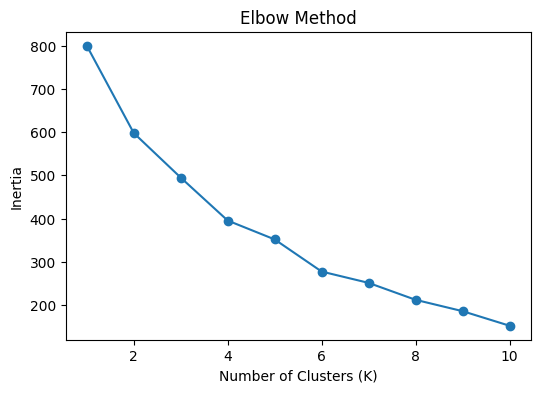

In [104]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

## **Understanding Parameters in K-Means**

| Parameter      | Default Value                               | Meaning                                                | Notes / How to Choose                                                        |
| -------------- | ------------------------------------------- | ------------------------------------------------------ | ---------------------------------------------------------------------------- |
| **n_clusters** |   8                                           | Number of clusters to form                             | Usually selected using Elbow Method or Silhouette Score                      |
| **init**       |   `'k-means++'`                               | Method used for choosing initial centroids             | `'k-means++'` is faster and smarter; `'random'` picks random starting points |
| **n_init**     |   10 (old versions) / `auto` (newer versions) | Number of runs with different centroid initializations | Best clustering (lowest inertia) is selected                                 |
| **max_iter**   |   300                                         | Maximum iterations allowed for a single run            | Increase if convergence is slow                                              |